# Bab Pengenalan

Nama : Praduta Firman

FTDS-Batch 001

Sumber Dataset : https://www.kaggle.com/amansaxena/lifeexpectancy

Dataset : Dataset berisi 6 kolom dan 223 baris. Setiap baris merupakan korespondensi dari setiap negara tentang ekspektasi kehidupan mereka.The dataset has three numeric columns, Overall Life Expectancy, Male Life Expectancy and Female Life Expectancy.The last column is Continent, which defines which continent that country lies in. Ini akan menjadi sangat berguna untuk pengkelasan data tersebut.

# Import Pustaka

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# Data Loading

In [2]:
df = pd.read_csv('Life_expectancy_dataset.csv')

In [3]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [4]:
df.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


In [5]:
df.shape

(223, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ KB


In [7]:
df.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


In [8]:
df.columns

Index(['Rank', 'Country', 'Overall Life', 'Male Life', 'Female Life',
       'Continent'],
      dtype='object')

# Data Cleaning

In [9]:
df.isna().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

Tidak ada missing values

# Eksplorasi Data

In [10]:
num_dat = df [df.describe().columns.values]
cat_dat = df.drop(columns = df.describe().columns.values)

# EDA

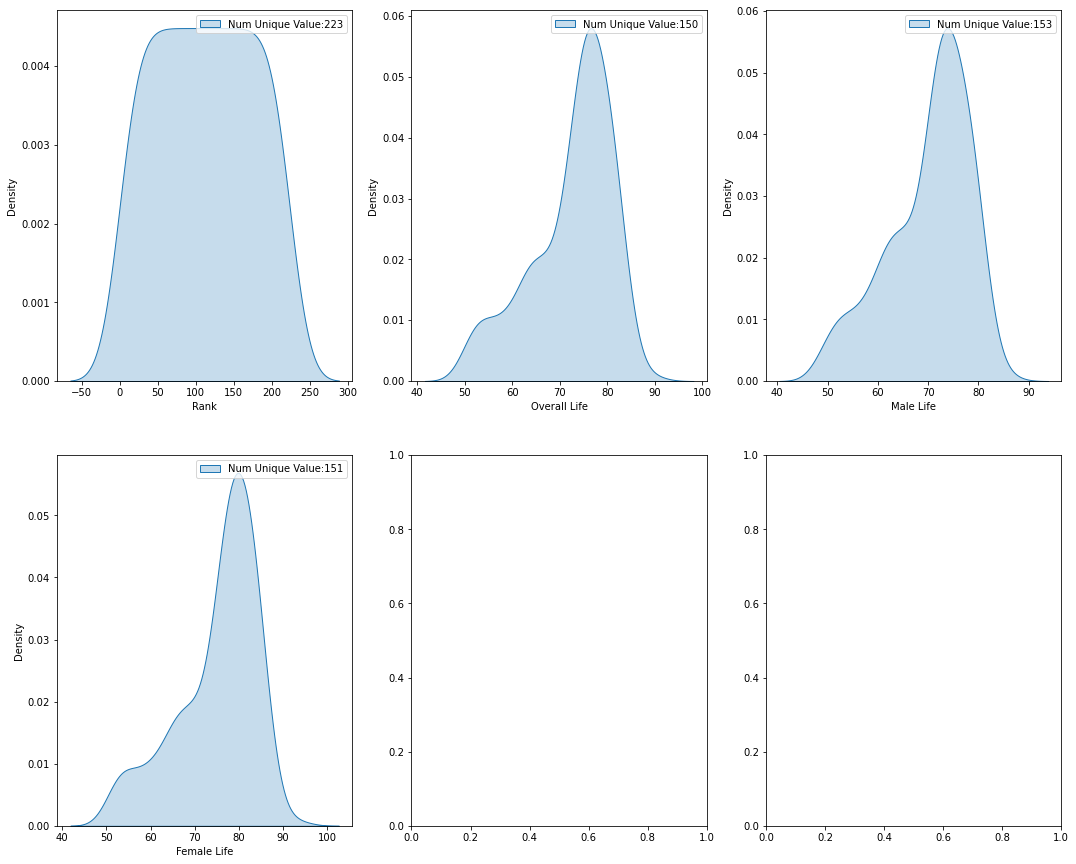

In [11]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(18,15))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

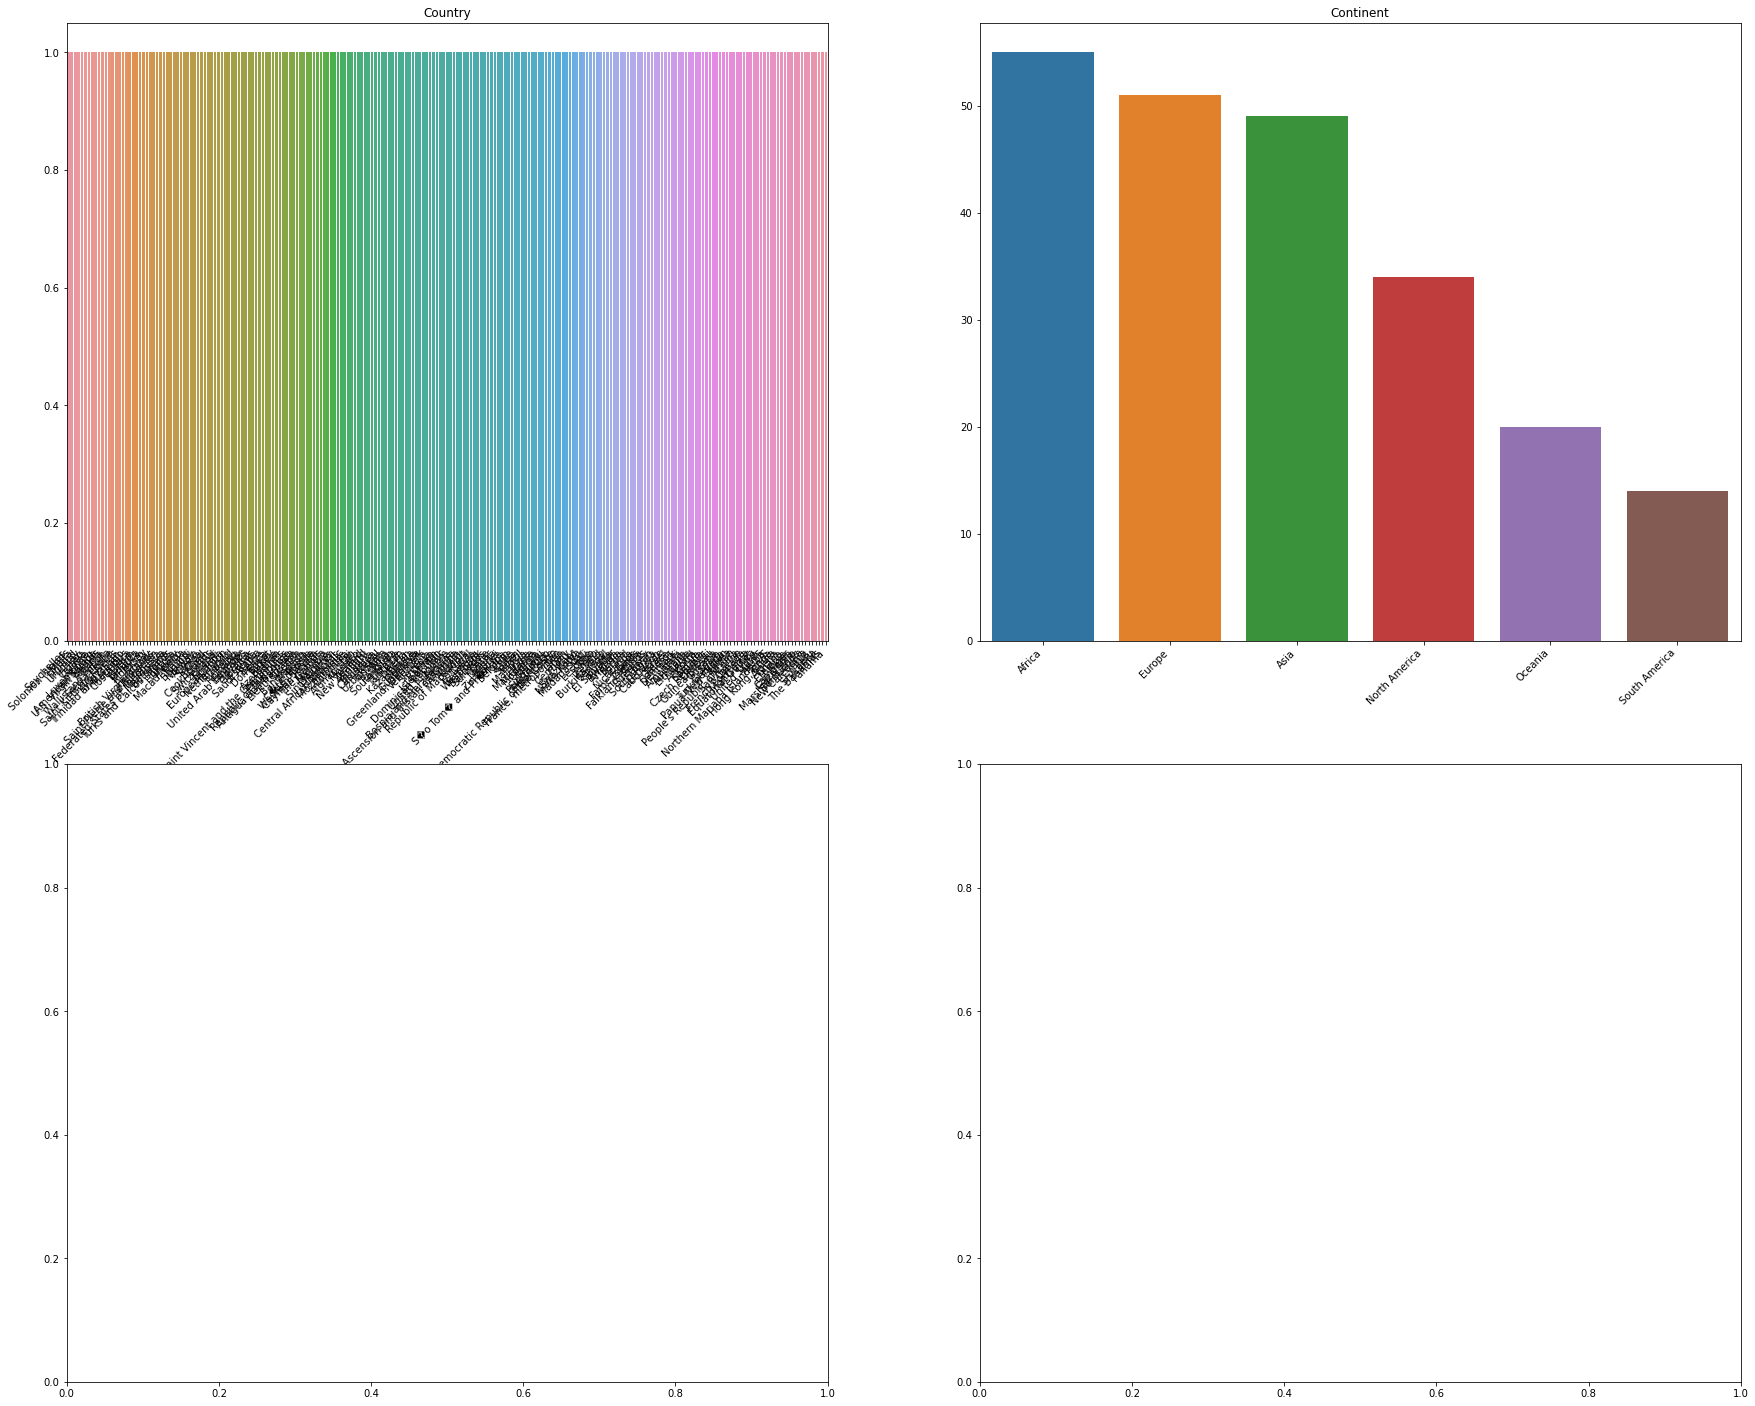

In [12]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(30,25))
i=0
j=0

for col in cat_dat.columns:
    val=cat_dat[col].value_counts()
    sns.barplot(x=val.index, y=val.values, ax=axes[i][j])
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45, ha='right')
    axes[i][j].set_title(col)
    j+=1
    if j>3:
        i+=1
        j=0

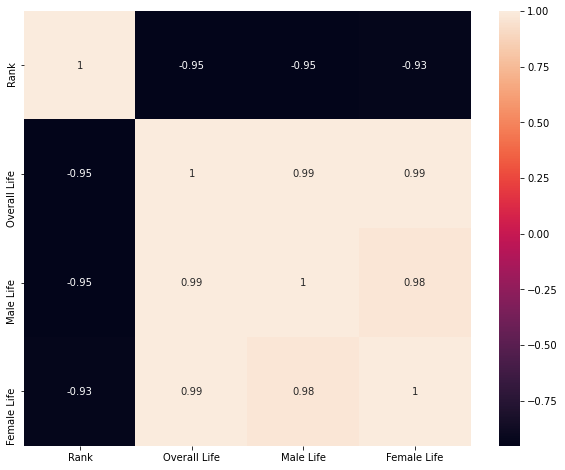

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

In [14]:
df.set_index('Continent')

,Rank,Country,Overall Life,Male Life,Female Life
Continent,,,,,
Europe,1,Monaco,89.5,85.6,93.5
Asia,2,Japan,85.0,81.7,88.5
Asia,3,Singapore,85.0,82.3,87.8
Asia,4,Macau; China,84.5,81.6,87.6
Europe,5,San Marino,83.3,80.7,86.1
...,...,...,...,...,...
Africa,219,Gabon,52.1,51.6,52.5
Africa,220,Swaziland,51.6,52.2,51.0
Asia,221,Afghanistan,51.3,49.9,52.7


In [15]:
df.groupby('Continent').mean()

,Rank,Overall Life,Male Life,Female Life
Continent,,,,
Africa,182.400000,61.800000,60.109091,63.583636
Asia,112.836735,73.618367,71.046939,76.138776
Europe,56.313725,79.019608,76.003922,82.237255
North America,87.147059,76.273529,73.914706,78.738235
Oceania,108.400000,74.230000,71.625000,76.915000
South America,100.857143,75.042857,72.157143,77.992857


EDA Analysis :
- Kehidupan wanita sangat berpengaruh pada kehidupan pria
- Kehidupan wanita dan pria  yang tinggi bisa mempengaruhu ranking
- Semua benua sama saja , kehidupan dan kehidupan pria keseluruhan sangat mempengaruhi dimana rendahnya kehidupan pria dan wanita.

# Feature Engineering

In [16]:
df.Continent.unique()

array(['Europe', 'Asia', 'Oceania', 'North America', 'Africa',
       'South America'], dtype=object)

In [18]:
le =LabelEncoder()
df['Continent'].replace({'Europe': 1, 'North America': 2, 'South America': 3, 'Asia': 4, 'Oceania': 5, 'Africa': 6},inplace =True)
df['Country'] = le.fit_transform(df['Country'])

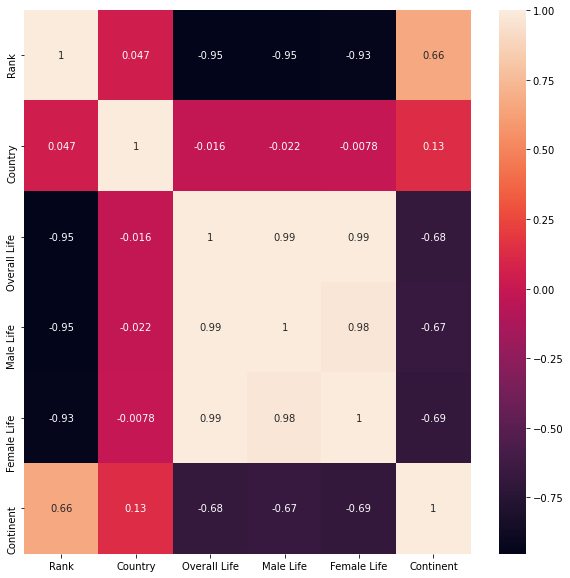

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

In [20]:
num_dat=df.drop(columns=['Rank','Country','Continent'])

In [21]:
scaler=StandardScaler()
num_dat_std=scaler.fit_transform(num_dat)

# PCA

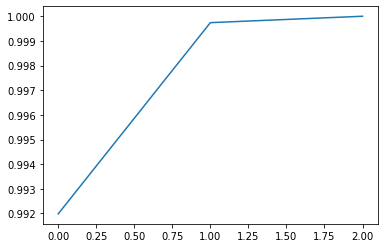

In [22]:
pca=PCA(whiten=True)
pca.fit(num_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [23]:
np.sum(pca.explained_variance_ratio_)

1.0

<AxesSubplot:>

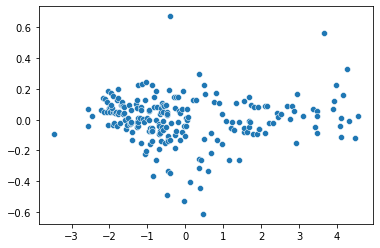

In [24]:
X2D = PCA(n_components=2).fit_transform(num_dat_std)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])

# Unsupervised Model Implementation


# K-Means

Elbow Method

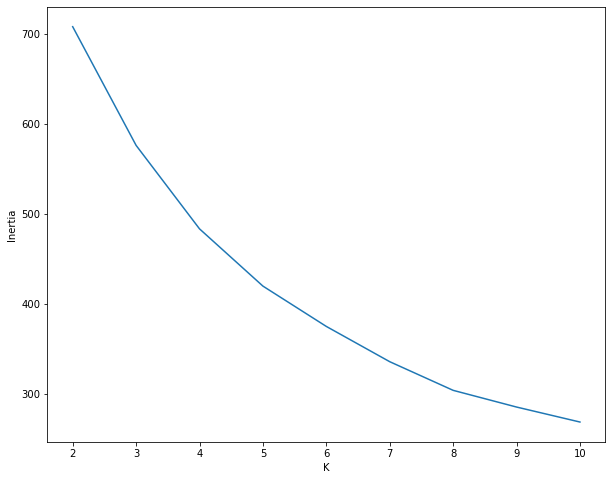

In [30]:
K=[2,3,4,5,6,7,8,9,10]
X_reduced=scaler.fit_transform(np.append(X2D,df[['Rank','Country','Continent']],axis=1))

inertia=[KMeans(n_clusters=i).fit(X_reduced).inertia_ for i in K]
plt.subplots(figsize=(10,8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show();

Silhouette Plot

Text(0, 0.5, 'Silhouettte Score')

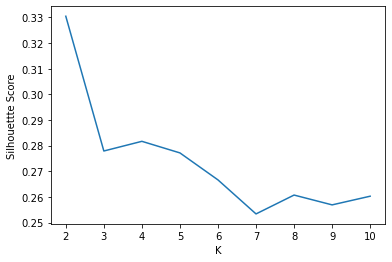

In [29]:
K=[2,3,4,5,6,7,8,9,10]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_for i in K]
s_score=[silhouette_score(X_reduced, KMeans(n_clusters=i).fit(X_reduced).labels_)for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouettte Score')

In [32]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.33045584512733017
For n_clusters = 3 The average silhouette_score is : 0.27241322165079007
For n_clusters = 4 The average silhouette_score is : 0.27246783035254785
For n_clusters = 5 The average silhouette_score is : 0.2760978822176359
For n_clusters = 6 The average silhouette_score is : 0.27068786263409395
For n_clusters = 7 The average silhouette_score is : 0.25463622786074447
For n_clusters = 8 The average silhouette_score is : 0.26046205202748407
For n_clusters = 9 The average silhouette_score is : 0.24975227331134545
For n_clusters = 10 The average silhouette_score is : 0.24051554008353232


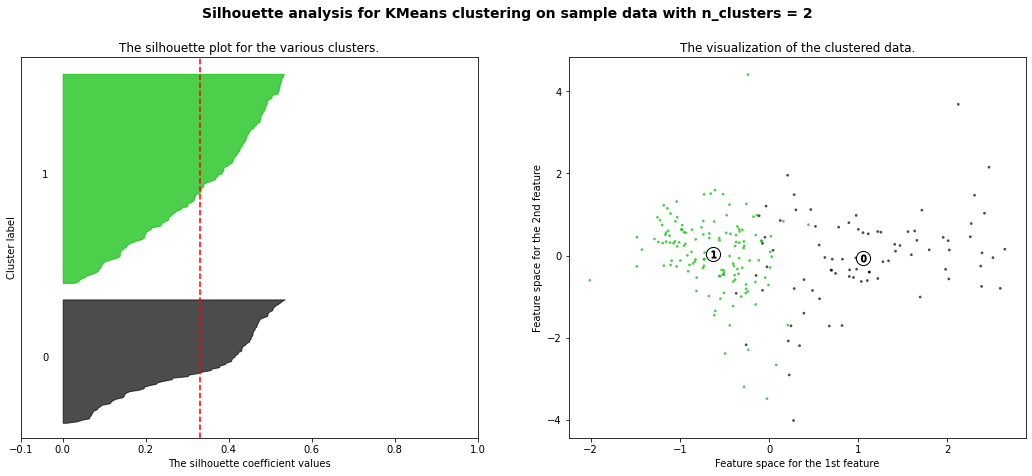

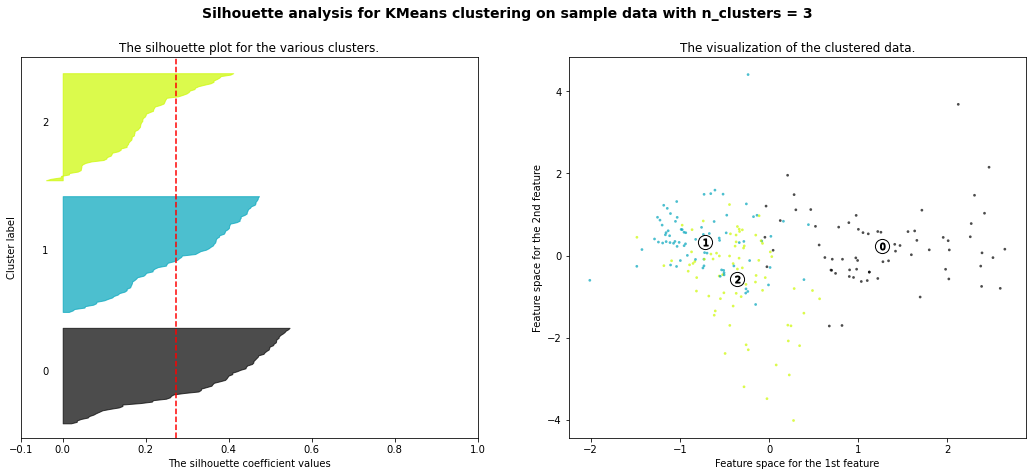

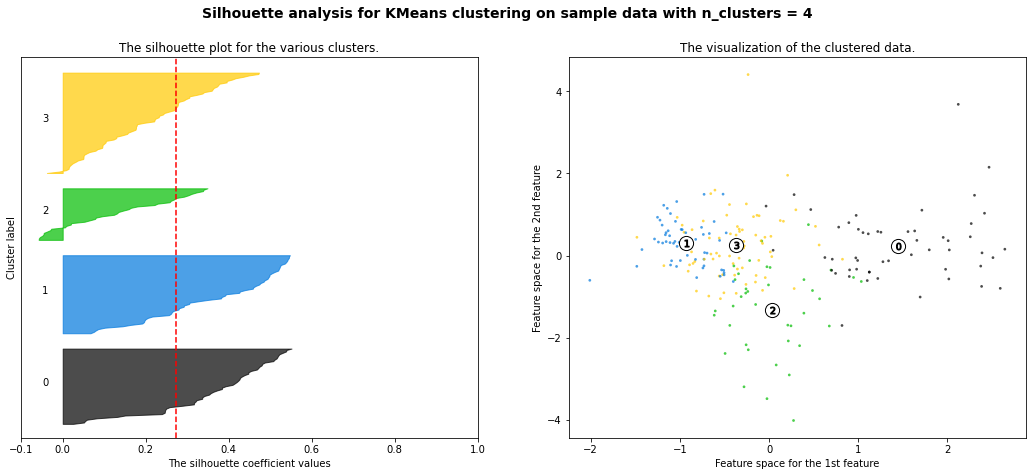

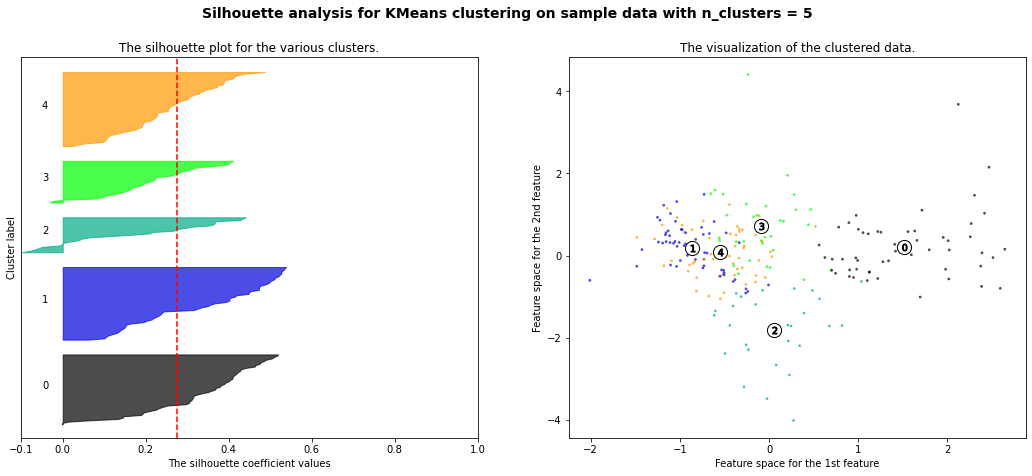

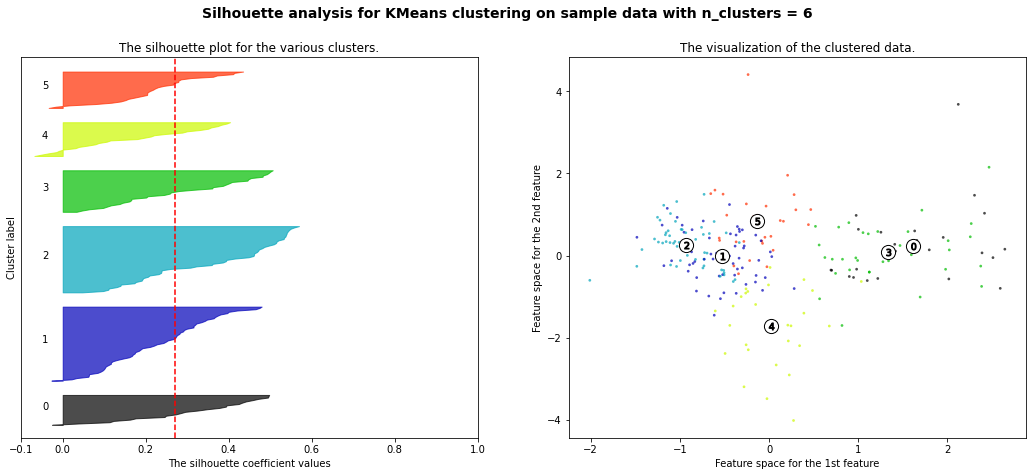

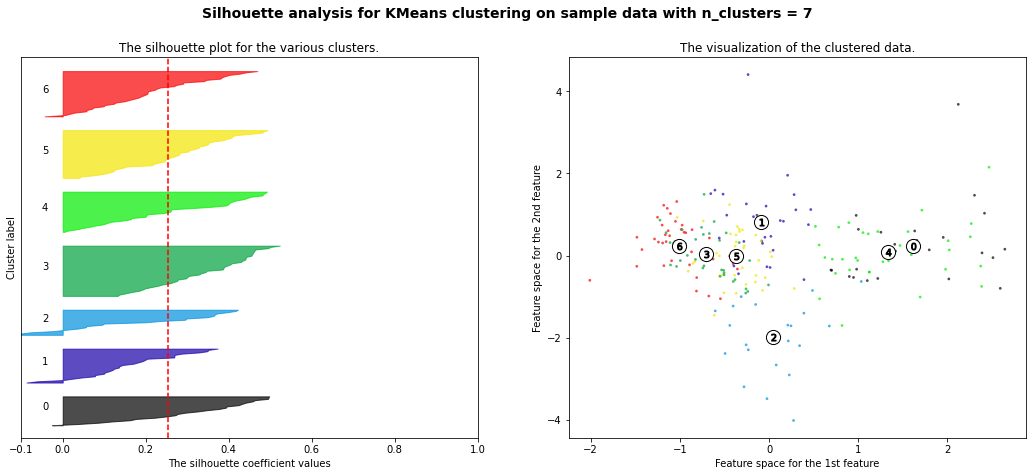

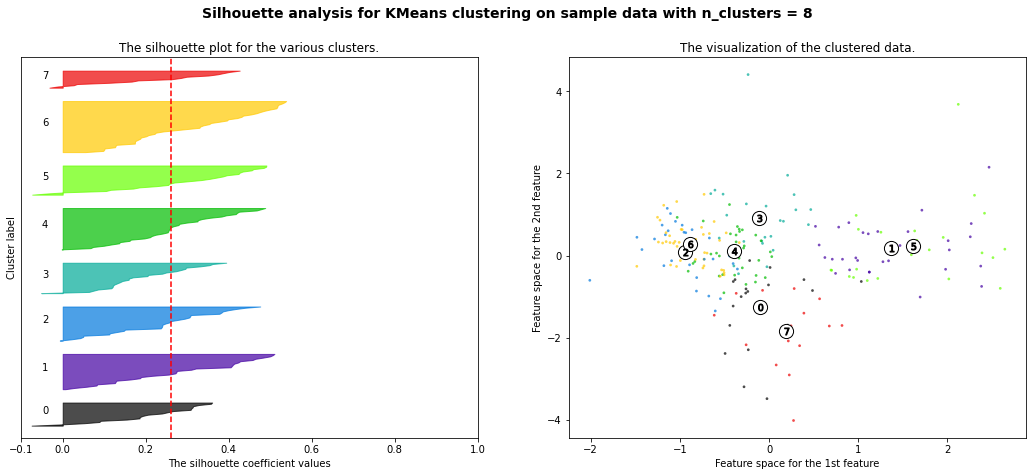

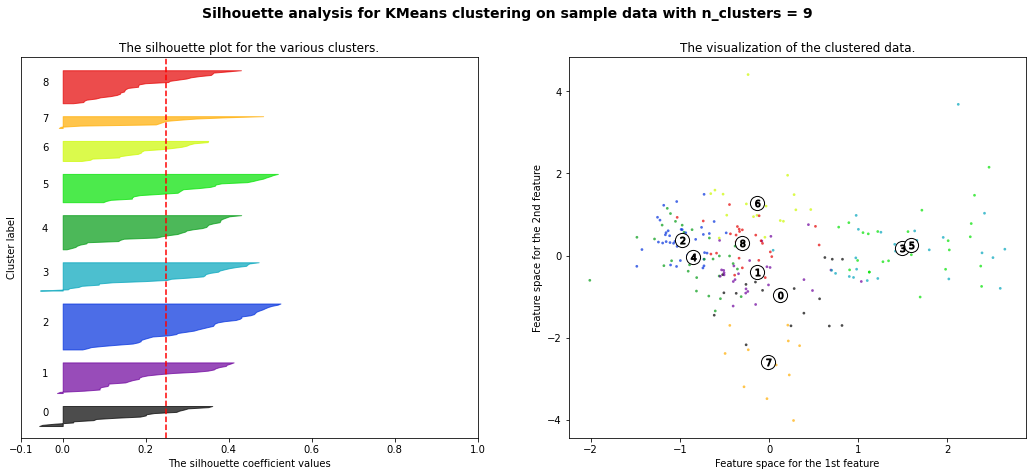

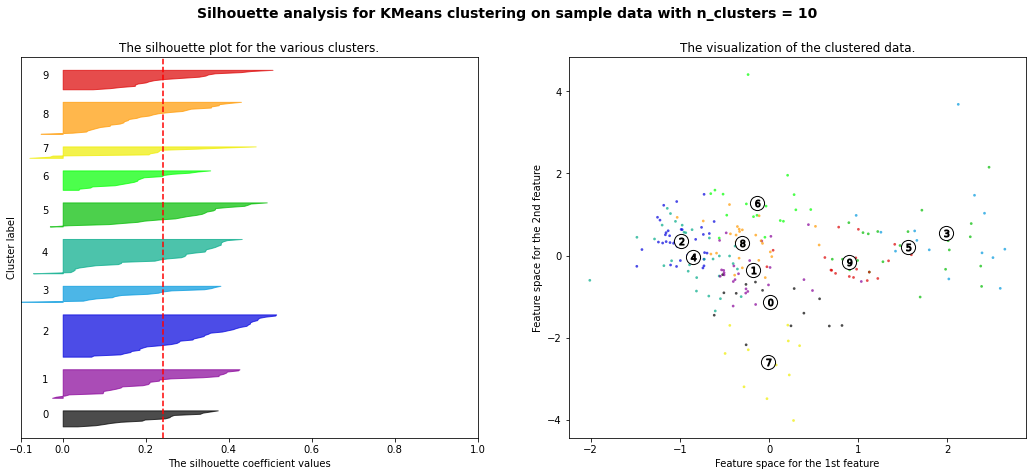

In [33]:
plot_silhouette(K,X_reduced)

In [35]:
scaler=StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Country','Rank']))
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

# Evaluasi Model

In [36]:
df['Cluster'] = kmeans.labels_

In [37]:
df.set_index('Cluster')

,Rank,Country,Overall Life,Male Life,Female Life,Continent
Cluster,,,,,,
0,1,127,89.5,85.6,93.5,1
3,2,98,85.0,81.7,88.5,4
3,3,174,85.0,82.3,87.8,4
3,4,115,84.5,81.6,87.6,4
0,5,168,83.3,80.7,86.1,1
...,...,...,...,...,...,...
2,219,70,52.1,51.6,52.5,6
2,220,186,51.6,52.2,51.0,6
2,221,0,51.3,49.9,52.7,4


In [38]:
df.Cluster.unique()

array([0, 3, 1, 2])

In [40]:
df.groupby('Cluster').mean()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
Cluster,,,,,,
0,66.108434,100.277108,78.202410,75.432530,81.137349,1.385542
1,172.733333,120.377778,66.382222,63.897778,68.795556,4.800000
2,209.500000,103.892857,55.600000,54.364286,56.860714,5.928571
3,87.313433,120.955224,76.567164,74.041791,79.208955,4.328358


# Komparasi Cluster 0,1,2, dan 3

- Mean kehidupan yang terjamin terdapat pada cluster 0 dan merupakan yang tertinggi diantara semua cluster
- Mean Kehidupan terendah ada pada cluster 2 diantara semua cluster
- Mean kehidupan pria tertinggi pada cluster 0
- Mean kehidupan wanita tertinggi pada cluster 0 juga 
- Mean kehidupan pria terendah pada cluster 2
- Mean kehidupan wanita terendah pada cluster 2 juga
- Jadi Cluster 0 merupakan cluster dengan angka mean/rata-rata tertinggi sementara cluster 2 merupakan yang terendah dari segala aspek , yaitu pria maupun wanitanya.

# Overall Analysisi

- Pada saat mengcluster data yang direduksi oleh PCA adalah numerik continous : Overall,Male Life, Female Life
- Setelah mengcluster data dievaluasi ke KMeans
- Kemudian saya buat inertia dan silhouette ke angka 4
- Setiap cluster bisa terus berubah tergantung dari penghitungan KMeans.